In [21]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt


In [22]:
data = np.load('shape_dataset.npy', allow_pickle=True).item()
X, y = data['X'], data['y']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (32, 45)
y_train shape: (32, 4)
X_test shape: (8, 45)
y_test shape: (8, 4)


Label: [0. 0. 1. 0.]


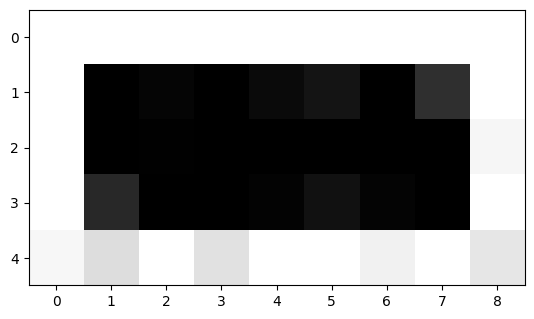

In [24]:
plt.imshow(X_train[0].reshape(5, 9) * 255, cmap="gray")
print("Label:", y_train[0])

Label: [0. 0. 0. 1.]


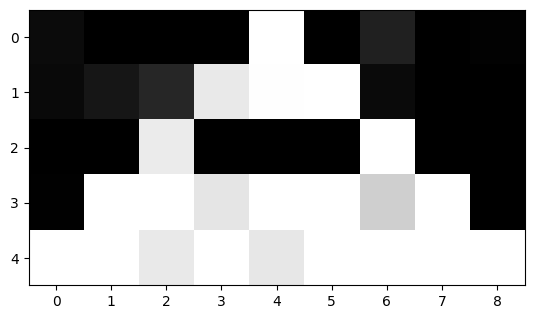

In [25]:
plt.imshow(X_train[1].reshape(5, 9) * 255, cmap="gray")
print("Label:", y_train[1])

Dataset has 4 classes:

1 - Circle
2 - Line
3 - Square
4 - Triangle

The labels are already One hot encoded


In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

First we will Test Random Forest Model

In [27]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [28]:
print("Evaluating model...")
y_pred_rf = rf.predict(X_test)

Evaluating model...


In [29]:
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [36]:
print(y_pred_rf)

[[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]]


It predicts everything well, now let's try KNN

In [34]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

print("Evaluating model...")
y_pred_knn = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", accuracy)


Evaluating model...
Accuracy: 1.0


In [35]:
print(y_pred_knn)

[[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]]


In [ ]:
# saving models

import joblib

joblib.dump(rf, 'random_forest_model.joblib')
joblib.dump(knn, 'knn_model.joblib')

KNN Also works very well, now I will try to create a Neural Network model almost from scratch and implement it on our datatet